In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
rmp_train = pd.read_csv('./rmp_train.csv')
rmp_test = pd.read_csv('./rmp_test.csv')

In [3]:
rmp_train

,GoodTeaching,Difficulty,Credit,Attendance,TakeAgain,Grade,Textbook,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,...,hilarious,inspirational,lecture_heavy,lots_of_homework,participation_matters,respected,skip_class_you_wont_pass,so_many_papers,test_heavy,tough_grader
0,1,3.0,Yes,Mandatory,Yes,A,Yes,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,4.0,Missing,Not,Missing,NotSure,No,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,4.0,Yes,Mandatory,Yes,B,No,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1,3.0,Yes,Mandatory,Yes,A,Yes,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,4.0,Yes,Mandatory,Yes,C,Yes,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20126,1,4.0,Yes,Mandatory,Yes,Missing,Yes,1,0,0,...,0,0,0,0,0,0,1,0,0,0
20127,0,3.0,Yes,Mandatory,Yes,Missing,No,0,0,0,...,0,0,0,0,0,0,0,1,0,1
20128,0,5.0,Yes,Not,Yes,Missing,Yes,0,0,0,...,0,0,1,0,0,0,0,0,0,1
20129,0,3.0,Yes,Not,Yes,B,Yes,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
rmp_test

,GoodTeaching,Difficulty,Credit,Attendance,TakeAgain,Grade,Textbook,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,...,hilarious,inspirational,lecture_heavy,lots_of_homework,participation_matters,respected,skip_class_you_wont_pass,so_many_papers,test_heavy,tough_grader
0,0,4.0,Yes,Mandatory,Yes,C,Yes,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,1,3.0,Yes,Mandatory,Yes,A,No,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1.0,Yes,Mandatory,Yes,A,No,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,5.0,Missing,Not,Missing,B,Yes,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,3.0,Yes,Mandatory,Yes,B,Yes,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,0,5.0,Yes,Mandatory,Yes,D,No,0,0,0,...,0,0,1,0,0,0,1,0,1,0
6707,0,5.0,Yes,Mandatory,Yes,C,Yes,0,0,0,...,0,0,1,1,0,0,0,0,0,0
6708,1,2.0,Yes,Mandatory,Yes,NotSure,Yes,1,0,0,...,0,1,0,0,0,1,0,0,0,0
6709,1,3.0,Yes,Mandatory,Yes,A,Yes,0,1,0,...,1,0,0,0,0,0,1,0,0,0


1    12333
0     7798
Name: GoodTeaching, dtype: int64


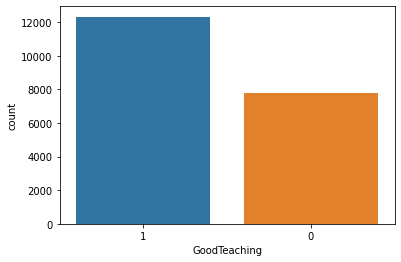

In [5]:
import seaborn as sns

sns.countplot(data = rmp_train, x = 'GoodTeaching', order=rmp_train['GoodTeaching'].value_counts().index);
print(rmp_train['GoodTeaching'].value_counts())

1    4112
0    2599
Name: GoodTeaching, dtype: int64


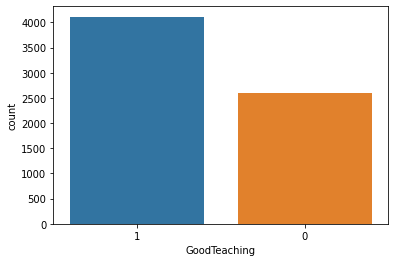

In [6]:
sns.countplot(data = rmp_test, x = 'GoodTeaching', order=rmp_test['GoodTeaching'].value_counts().index);
print(rmp_test['GoodTeaching'].value_counts())

In [7]:
# Baseline accuracy
print('Baseline ACC: ', 4112/(4112 + 2599))

Baseline ACC:  0.6127253762479511


#### One-hot encoding for non-numeric columns

In [8]:
rmp_train_enc = pd.get_dummies(rmp_train, columns=['Credit', 'Attendance', 'TakeAgain', 'Grade', 'Textbook'])
rmp_test_enc = pd.get_dummies(rmp_test, columns=['Credit', 'Attendance', 'TakeAgain', 'Grade', 'Textbook'])

In [9]:
rmp_train_enc

,GoodTeaching,Difficulty,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,caring,clear_grading_criteria,extra_credit,get_ready_to_read,gives_good_feedback,...,Grade_D,Grade_Drop,Grade_F,Grade_Incomplete,Grade_Missing,Grade_NotSure,Grade_Rather,Textbook_Missing,Textbook_No,Textbook_Yes
0,1,3.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,3.0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,4.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20126,1,4.0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
20127,0,3.0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
20128,0,5.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
20129,0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
rmp_test_enc

,GoodTeaching,Difficulty,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,caring,clear_grading_criteria,extra_credit,get_ready_to_read,gives_good_feedback,...,Grade_D,Grade_Drop,Grade_F,Grade_Incomplete,Grade_Missing,Grade_NotSure,Grade_Rather,Textbook_Missing,Textbook_No,Textbook_Yes
0,0,4.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,3.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,1,1.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,5.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,3.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6706,0,5.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6707,0,5.0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6708,1,2.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6709,1,3.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Frequency of tags

- Though some of them are very 'rare', we cannot directly judge their predictive power

In [11]:
rmp_train_enc.iloc[:, 2:].sum().sort_values()

Grade_AuditNoGrade             32
Textbook_Missing               93
Grade_Incomplete              100
Grade_F                       140
Grade_Rather                  221
Grade_D                       249
Grade_Drop                    357
Credit_Missing                566
TakeAgain_Missing             566
beware_of_pop_quizzes         577
so_many_papers                885
group_projects                935
Grade_C                      1091
Grade_NotSure                1290
extra_credit                 1304
inspirational                1945
hilarious                    2372
Attendance_Missing           2384
graded_by_few_things         2457
accessible_outside_class     2536
test_heavy                   2559
clear_grading_criteria       2686
amazing_lectures             2816
participation_matters        2997
lots_of_homework             3191
Grade_B                      3325
lecture_heavy                3385
respected                    3530
skip_class_you_wont_pass     3732
caring        

#### Split independent & dependent variables

In [12]:
y_train = rmp_train['GoodTeaching']
X_train = rmp_train_enc.drop(['GoodTeaching'], axis=1)

y_test = rmp_test['GoodTeaching']
X_test = rmp_test_enc.drop(['GoodTeaching'], axis=1)

In [13]:
X_train

,Difficulty,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,caring,clear_grading_criteria,extra_credit,get_ready_to_read,gives_good_feedback,graded_by_few_things,...,Grade_D,Grade_Drop,Grade_F,Grade_Incomplete,Grade_Missing,Grade_NotSure,Grade_Rather,Textbook_Missing,Textbook_No,Textbook_Yes
0,3.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3.0,0,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,4.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20126,4.0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
20127,3.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
20128,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
20129,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Firstly we use all attributes for training to see the model performance

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [15]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [16]:
y_prob_lda = lda.predict_proba(X_test)
y_pred_lda = pd.Series([1 if x > 0.5 else 0 for x in y_prob_lda[:,1]])

In [17]:
from sklearn.metrics import confusion_matrix

lda_cm = confusion_matrix(y_test, y_pred_lda)
print("Confusion Matrix: \n", lda_cm)
print("\nAccuracy:", accuracy_score(y_test, y_pred_lda))
print("TPR: ", lda_cm[1, 1] / (lda_cm[1, 0] + lda_cm[1, 1]))
print("FPR: ", lda_cm[0, 1] / (lda_cm[0, 0] + lda_cm[0, 1]))

Confusion Matrix: 
 [[2250  349]
 [ 512 3600]]

Accuracy: 0.8717031738936075
TPR:  0.8754863813229572
FPR:  0.13428241631396692


#### Then we go deeper into the LDA theory part, to see whether we can optimize the model performance

From the API document, we can deduce the following relation:

$$log\left(\frac{P(Y = 1 | X)}{P(Y = 0 | X)}\right) = decision\_function(X) = w_1^T * X + w_0$$

i.e. that's why LDA is called "Linear", where $w_1$ and $w_0$ can be retrieved from `coef_`, `intercept_` attributes of LDA instances\

Therefore, if we let $d = decision\_function(X) = w_1^T * X + w_0$, then
$$P(Y = 1 | X) = \frac{e^d}{e^d + 1}$$
$$P(Y = 0 | X) = \frac{1}{e^d + 1}$$

i.e. for a fixed sample value X,
- if $w_1 > 0$, a larger $w_1$ value will cause $d$ be higher, then a higher probability the observation belongs to class 1
- if $w_1 < 0$, a larger $abs(w_1)$ value will cause $d$ be lower, then a higher probability the observation belongs to class 0

In both cases, the higher absolute value of coefficients, the higher the influence on the linear discriminant and thus on final classification results

Resources: https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda-math

In [18]:
# 'coefficient' w_1 for each feature
coef_df = pd.DataFrame({'Coef': lda.coef_[0]}, index=list(X_train.columns))
coef_df

,Coef
Difficulty,-0.241999
accessible_outside_class,2.287380
amazing_lectures,3.040208
beware_of_pop_quizzes,-0.088803
caring,2.546241
clear_grading_criteria,2.453513
extra_credit,2.169651
get_ready_to_read,0.524776
gives_good_feedback,2.833561
graded_by_few_things,0.092522


In [19]:
y_prob_lda

array([[0.96721351, 0.03278649],
       [0.07348939, 0.92651061],
       [0.15498513, 0.84501487],
       ...,
       [0.01053585, 0.98946415],
       [0.00682453, 0.99317547],
       [0.00921237, 0.99078763]])

#### Let's verify the above deduced formula is correct, taking the first sample as an example:

In [20]:
# log(P(Y = 1 | X) / P(Y = 0 | X))

np.log(0.03278649/0.96721351)

-3.3844027270624206

In [21]:
# w1 (coef_) * X + w0 (intercept)

np.dot(X_test.iloc[0, :].values, lda.coef_.reshape(42, 1)) + lda.intercept_

array([-3.38440281])

In [22]:
# decision_function(X)

lda.decision_function(X_test.iloc[0, :].values.reshape(1, -1))

d:\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array([-3.38440281])

#### We cannot directly use the current `coef_` to choose more 'discriminant' features, because not all features we used are in the same range, e.g. `Difficulty` attribute are in range(1, 5), while one-hot encoding features are only 0/1 values.

#### Therefore, to compare them in a uniform manner, we should consider some standardization tricks

### Standardize

#### StandardScaler()

First we consider the normalization $X_{norm} = \frac{X - \mu}{\sigma}$

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(data=X_train_scaled, columns=X_train.columns)

#### But if we look at the distribution of data, we can see this is a bad idea: 

- Most features are casted to some 'bad' values, increasing the difficulty of fitting
- Though centered and reduced (mean = 0, std = 1), some 0/1 features are casted to a even larger range, e.g. [0, 25], contradict to our original intention

In [24]:
X_train_scaled.describe()

,Difficulty,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,caring,clear_grading_criteria,extra_credit,get_ready_to_read,gives_good_feedback,graded_by_few_things,...,Grade_D,Grade_Drop,Grade_F,Grade_Incomplete,Grade_Missing,Grade_NotSure,Grade_Rather,Textbook_Missing,Textbook_No,Textbook_Yes
count,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,...,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04,2.013100e+04
mean,-8.823987e-17,-2.064813e-17,-8.365140e-17,-7.129782e-17,9.741682e-17,-4.800249e-17,-2.329533e-17,5.612056e-17,4.941433e-18,2.258941e-17,...,-1.694206e-17,3.529595e-17,-3.070748e-17,-1.411838e-18,1.044760e-16,4.482585e-17,1.200062e-17,-2.047165e-17,3.882554e-18,1.065938e-16
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.988278e+00,-3.796470e-01,-4.032785e-01,-1.717790e-01,-4.854247e-01,-3.923896e-01,-2.631772e-01,-4.942340e-01,-4.978879e-01,-3.728509e-01,...,-1.119102e-01,-1.343652e-01,-8.368483e-02,-7.065594e-02,-5.505870e-01,-2.616633e-01,-1.053563e-01,-6.812622e-02,-7.567110e-01,-1.308425e+00
25%,-2.632785e-01,-3.796470e-01,-4.032785e-01,-1.717790e-01,-4.854247e-01,-3.923896e-01,-2.631772e-01,-4.942340e-01,-4.978879e-01,-3.728509e-01,...,-1.119102e-01,-1.343652e-01,-8.368483e-02,-7.065594e-02,-5.505870e-01,-2.616633e-01,-1.053563e-01,-6.812622e-02,-7.567110e-01,-1.308425e+00
50%,-2.632785e-01,-3.796470e-01,-4.032785e-01,-1.717790e-01,-4.854247e-01,-3.923896e-01,-2.631772e-01,-4.942340e-01,-4.978879e-01,-3.728509e-01,...,-1.119102e-01,-1.343652e-01,-8.368483e-02,-7.065594e-02,-5.505870e-01,-2.616633e-01,-1.053563e-01,-6.812622e-02,-7.567110e-01,7.642776e-01
75%,5.992210e-01,-3.796470e-01,-4.032785e-01,-1.717790e-01,-4.854247e-01,-3.923896e-01,-2.631772e-01,-4.942340e-01,-4.978879e-01,-3.728509e-01,...,-1.119102e-01,-1.343652e-01,-8.368483e-02,-7.065594e-02,-5.505870e-01,-2.616633e-01,-1.053563e-01,-6.812622e-02,1.321509e+00,7.642776e-01
max,1.461721e+00,2.634026e+00,2.479676e+00,5.821433e+00,2.060052e+00,2.548487e+00,3.799721e+00,2.023333e+00,2.008484e+00,2.682038e+00,...,8.935737e+00,7.442403e+00,1.194960e+01,1.415309e+01,1.816243e+00,3.821705e+00,9.491601e+00,1.467864e+01,1.321509e+00,7.642776e-01


#### MinMaxScaler()

We consider another normalization method: 
$$ X_{scaled} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

Some benefits:
- transformed values are between 0 and 1
- 0/1 encoding features will keep original values


In [25]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X_train)  # fit the training data

X_train_minmax = minmax_scaler.transform(X_train)
X_train_minmax = pd.DataFrame(data=X_train_minmax, columns=X_train.columns)

# normalize the test data using training data's max/min
X_test_minmax = minmax_scaler.transform(X_test)
X_test_minmax = pd.DataFrame(data=X_test_minmax, columns=X_test.columns)

In [26]:
X_train_minmax.describe()

,Difficulty,accessible_outside_class,amazing_lectures,beware_of_pop_quizzes,caring,clear_grading_criteria,extra_credit,get_ready_to_read,gives_good_feedback,graded_by_few_things,...,Grade_D,Grade_Drop,Grade_F,Grade_Incomplete,Grade_Missing,Grade_NotSure,Grade_Rather,Textbook_Missing,Textbook_No,Textbook_Yes
count,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,...,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000,20131.000000
mean,0.576313,0.125975,0.139884,0.028662,0.190701,0.133426,0.064776,0.196314,0.198649,0.122051,...,0.012369,0.017734,0.006954,0.004967,0.232626,0.064080,0.010978,0.004620,0.364115,0.631265
std,0.289862,0.331829,0.346875,0.166860,0.392864,0.340043,0.246136,0.397219,0.398993,0.327352,...,0.110529,0.131986,0.083105,0.070307,0.422516,0.244902,0.104202,0.067813,0.481193,0.482474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Train LDA with normalized data

In [27]:
lda_minmax = LinearDiscriminantAnalysis()
lda_minmax.fit(X_train_minmax, y_train)

LinearDiscriminantAnalysis()

In [28]:
y_prob_minmax = lda_minmax.predict_proba(X_test_minmax)
y_pred_minmax = pd.Series([1 if x > 0.5 else 0 for x in y_prob_minmax[:,1]])

In [29]:
lda_minmax_cm = confusion_matrix(y_test, y_pred_minmax)
print("Normed Confusion Matrix: \n", lda_minmax_cm)
print("\nAccuracy:", accuracy_score(y_test, y_pred_minmax))
print("TPR: ", lda_minmax_cm[1, 1] / (lda_minmax_cm[1, 0] + lda_minmax_cm[1, 1]))
print("FPR: ", lda_minmax_cm[0, 1] / (lda_minmax_cm[0, 0] + lda_minmax_cm[0, 1]))

Normed Confusion Matrix: 
 [[2250  349]
 [ 512 3600]]

Accuracy: 0.8717031738936075
TPR:  0.8754863813229572
FPR:  0.13428241631396692


#### As expected, the metrics should be the same, but we should see some differences for *coefficients* of `Difficulty` (range changed)
- Previously coef for `Difficulty` is -0.24, here it becomes -0.96 after being normed into [0, 1] range
- The intuition is correct: since its range is smaller now, its coefficient will become *'larger'* (in the sense of absolute value)

In [30]:
coef_normed = pd.DataFrame({'Normed_Coef': lda_minmax.coef_[0]}, index=list(X_train.columns))
coef_normed

,Normed_Coef
Difficulty,-0.967996
accessible_outside_class,2.287380
amazing_lectures,3.040208
beware_of_pop_quizzes,-0.088803
caring,2.546241
clear_grading_criteria,2.453513
extra_credit,2.169651
get_ready_to_read,0.524776
gives_good_feedback,2.833561
graded_by_few_things,0.092522


In [31]:
abs_coef_normed = coef_normed.apply(np.abs)
abs_coef_normed.sort_values(by='Normed_Coef', ascending=False ,inplace=True)

In [33]:
abs_coef_normed['Rank'] = np.arange(1, len(abs_coef_normed) + 1, 1)

In [34]:
abs_coef_normed

,Normed_Coef,Rank
amazing_lectures,3.040208,1
gives_good_feedback,2.833561,2
respected,2.653169,3
hilarious,2.645360,4
caring,2.546241,5
clear_grading_criteria,2.453513,6
inspirational,2.305894,7
accessible_outside_class,2.287380,8
extra_credit,2.169651,9
Grade_Drop,2.019350,10


#### Put original coefficient dataframe for comparison

In [35]:
abs_coef = coef_df.apply(np.abs)
abs_coef.sort_values(by='Coef', ascending=False, inplace=True)
abs_coef['Rank'] = np.arange(1, len(abs_coef)+1, 1)

In [36]:
order_df = abs_coef.loc[:, ['Rank']].join(abs_coef_normed.loc[:, ['Rank']], how='inner', rsuffix='_normed')

#### We can see the only difference in *ordered* `coef_` is the `Difficulty` attribute, that's where normalization works

In [37]:
order_df

,Rank,Rank_normed
amazing_lectures,1,1
gives_good_feedback,2,2
respected,3,3
hilarious,4,4
caring,5,5
clear_grading_criteria,6,6
inspirational,7,7
accessible_outside_class,8,8
extra_credit,9,9
Grade_Drop,10,10


#### Feature selection

Since GridSearch is not compatible with LDA settings, we will write a custom function to manually select the most ***important*** n features by choosing the n features with highest absolute value of `coef_` 

In [38]:
# original performance of LDA using all features

print("Confusion Matrix (All features): \n", lda_cm)
print("\nAccuracy:", accuracy_score(y_test, y_pred_lda))
print("TPR: ", lda_cm[1, 1] / (lda_cm[1, 0] + lda_cm[1, 1]))
print("FPR: ", lda_cm[0, 1] / (lda_cm[0, 0] + lda_cm[0, 1]))

Confusion Matrix (All features): 
 [[2250  349]
 [ 512 3600]]

Accuracy: 0.8717031738936075
TPR:  0.8754863813229572
FPR:  0.13428241631396692


#### Custom function that output metrics for LDA model with different number of important features

In [39]:
def lda_metrics(X_train, y_train, X_test, y_test, feature_df, n):
    # select the first n important features
    feature_selected = list(feature_df.index)[:n]
    X_train_selected = X_train[feature_selected]
    X_test_selected = X_test[feature_selected]
    
    lda_selected = LinearDiscriminantAnalysis()
    lda_selected.fit(X_train_selected, y_train)
    
    y_prob_selected = lda_selected.predict_proba(X_test_selected)
    y_pred_selected = pd.Series([1 if x > 0.5 else 0 for x in y_prob_selected[:,1]])
    
    lda_selected_cm = confusion_matrix(y_test, y_pred_selected)
    acc = accuracy_score(y_test, y_pred_selected)
    tpr = lda_selected_cm[1, 1] / (lda_selected_cm[1, 0] + lda_selected_cm[1, 1])
    fpr = lda_selected_cm[0, 1] / (lda_selected_cm[0, 0] + lda_selected_cm[0, 1])
    
    return acc, tpr, fpr

In [41]:
lda_metrics(X_train_minmax, y_train, X_test_minmax, y_test, abs_coef_normed, n=42)   # all features, verify the custom function works

(0.8717031738936075, 0.8754863813229572, 0.13428241631396692)

In [42]:
# loop to obtain metrics for LDA with different feature numbers

acc_list = []
tpr_list = []
fpr_list = []
for i in range(1, 43):
    metrics = lda_metrics(X_train_minmax, y_train, X_test_minmax, y_test, abs_coef_normed, n=i)
    acc_list.append(metrics[0])
    tpr_list.append(metrics[1])
    fpr_list.append(metrics[2])

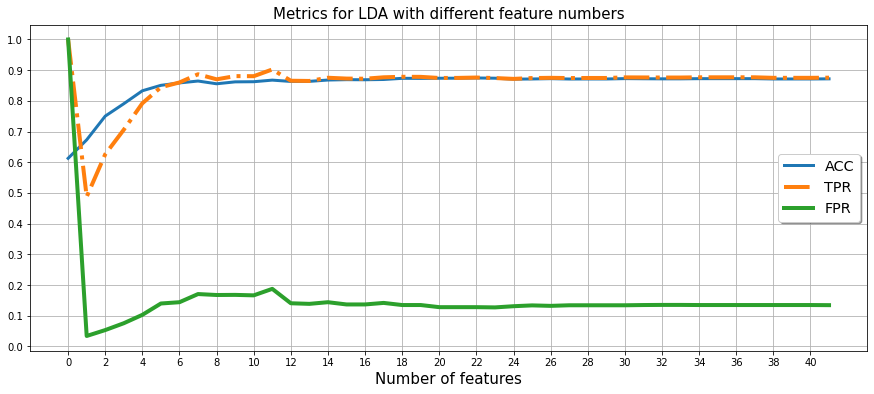

In [68]:
plt.figure(figsize=(15, 6))
plt.plot(acc_list, label='ACC', lw=3)
plt.plot(tpr_list, label='TPR', linestyle='-.', lw=4)
plt.plot(fpr_list, label='FPR', lw=4)
plt.xticks(np.arange(0, 42, 2))
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.legend(loc='center right', fontsize='x-large', shadow=True)
plt.title('Metrics for LDA with different feature numbers', fontsize=15)
plt.xlabel('Number of features', fontsize=15)
plt.grid()
plt.savefig('./metric.jpg')

#### Generally we can say the best model is hidden around 15 ~ 25 feature numbers from the above graph

#### Our goal in this task is generally to optimize the *accuracy*, because
- TP: we detect the good teaching perforamce cases
- TN: we also detect the 'bad'/not good enough teaching performace cases

Though these two are in a trade-off relationship, accuracy is generally a good metric in this task. Also if you have specific goal/tendency, you can choose attributes with higher positive coefficient to optimize TPR (i.e. detect more better teaching performance cases) or higher (abs) negetive coefficient to optimize FPR (i.e. detect more bad/not good enough teaching performance cases)

In [44]:
np.argmax(acc_list)

22

In [45]:
lda_metrics(X_train_minmax, y_train, X_test_minmax, y_test, abs_coef_normed, n=23)

(0.8745343465951423, 0.8759727626459144, 0.12774143901500576)

#### We should also look at ROC curves and AUCs for performance comparison

In [46]:
from sklearn.metrics import roc_auc_score

def lda_model(X_train, y_train, X_test, y_test, feature_df, n):
    # select the first n important features
    feature_selected = list(feature_df.index)[:n]
    X_train_selected = X_train[feature_selected]
    X_test_selected = X_test[feature_selected]
    
    lda_selected = LinearDiscriminantAnalysis()
    lda_selected.fit(X_train_selected, y_train)
    
    y_prob_lda = lda_selected.predict_proba(X_test_selected)
    auc = roc_auc_score(y_test, y_prob_lda[:, 1])
    
    return lda_selected, feature_selected, auc

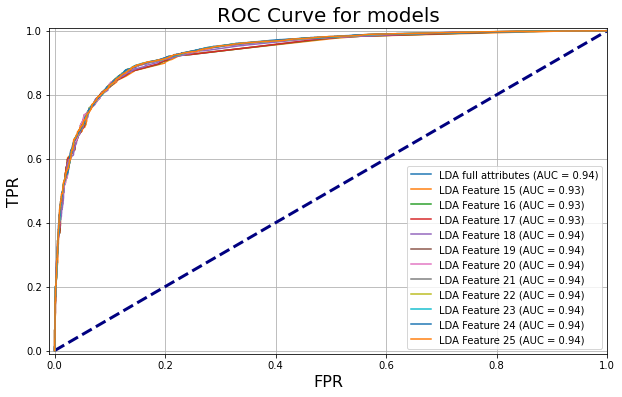

In [69]:
from sklearn.metrics import plot_roc_curve
import warnings
warnings.simplefilter('ignore')

plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plot_roc_curve(lda, X_test, y_test, label = 'LDA full attributes (AUC = 0.94)', ax=plt.gca())

# loop to draw ROC curves for different feature numbers
for i in range(15, 26):
    model, feature_selected, auc = lda_model(X_train_minmax, y_train, X_test_minmax, y_test, abs_coef_normed, n=i)
    plot_roc_curve(model, X_test_minmax[feature_selected], y_test, ax=plt.gca(), label='LDA Feature %d (AUC = %.2f)' % (i, auc))

plt.title('ROC Curve for models', fontsize=20)
plt.xlabel('FPR', fontsize=16)
plt.ylabel('TPR', fontsize=16)
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.savefig('./ROC.jpg')
plt.show()

#### Generally their performance are very close to each other, but we through feature selection, only using the features with the highest predictive power to achieve the similar performance, i.e. dimensionality reduction

In [49]:
list(abs_coef_normed.index)[:23]

['amazing_lectures',
 'gives_good_feedback',
 'respected',
 'hilarious',
 'caring',
 'clear_grading_criteria',
 'inspirational',
 'accessible_outside_class',
 'extra_credit',
 'Grade_Drop',
 'Grade_F',
 'Grade_D',
 'participation_matters',
 'Grade_Rather',
 'tough_grader',
 'Grade_C',
 'Grade_Incomplete',
 'Difficulty',
 'Grade_A',
 'Grade_AuditNoGrade',
 'skip_class_you_wont_pass',
 'Textbook_Missing',
 'so_many_papers']

#### Finally, we re-train the optimized LDA model for Bootstrap validation to assess the variability of metrics

In [50]:
selected_features = list(abs_coef_normed.index)[:23]

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
    
lda_optimized = LinearDiscriminantAnalysis()
lda_optimized.fit(X_train_selected, y_train)

LinearDiscriminantAnalysis()

In [51]:
y_prob_op = lda_optimized.predict_proba(X_test_selected)
y_pred_op = pd.Series([1 if x > 0.5 else 0 for x in y_prob_op[:, 1]])

In [52]:
# optimized model
lda_op = confusion_matrix(y_test, y_pred_op)

print("Confusion Matrix (optimal): \n", lda_op)
print("\nAccuracy:", accuracy_score(y_test, y_pred_op))
print("TPR: ", lda_op[1, 1] / (lda_op[1, 0] + lda_op[1, 1]))
print("FPR: ", lda_op[0, 1] / (lda_op[0, 0] + lda_op[0, 1]))

Confusion Matrix (optimal): 
 [[2267  332]
 [ 510 3602]]

Accuracy: 0.8745343465951423
TPR:  0.8759727626459144
FPR:  0.12774143901500576


#### Define metric functions

In [53]:
def ACC(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred, y_test)
    return (cm[0, 0] + cm[1, 1]) / np.sum(cm.ravel())

def TPR(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred, y_test)
    return cm[1, 1] / (cm[1, 0] + cm[1, 1])

def FPR(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_pred, y_test)
    return cm[0, 1] / (cm[0, 0] + cm[0, 1])

#### Bootstrap function

In [54]:
def bootstrap_validation(model, test_data, test_label, metrics_list, sample = 500):
    n_sample = sample
    n_metrics = len(metrics_list)
    output_array = np.zeros([n_sample, n_metrics])
    output_array[:] = np.nan
    print(output_array.shape)
    
    # iterate over bootstrap samples from testing data
    for bs_iter in range(n_sample):
        bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
        
        for metrics_iter in range(n_metrics):
            metrics = metrics_list[metrics_iter]
            
            # model performance under current metric
            output_array[bs_iter, metrics_iter] = \
            metrics(model, test_data.loc[bs_index], test_label.loc[bs_index])

    output_df = pd.DataFrame(output_array)
    return output_df

In [63]:
bs_output = bootstrap_validation(lda_optimized, X_test_selected, y_test, metrics_list = [ACC, TPR, FPR], sample = 5000)

(5000, 3)


#### 95% confidence interval of different metrics for LDA model

In [74]:
ACC_mean = np.mean(bs_output.iloc[:, 0])
TPR_mean = np.mean(bs_output.iloc[:, 1])
FPR_mean = np.mean(bs_output.iloc[:, 2])

print("The mean of LDA Accuracy is: ", ACC_mean)
print("The mean of LDA TPR is: ", TPR_mean)
print("The mean of LDA FPR is: ", FPR_mean)

The mean of LDA Accuracy is:  0.874575264491134
The mean of LDA TPR is:  0.9156678758281213
The mean of LDA FPR is:  0.18365453830581413


In [64]:
CI_ACC = np.quantile(bs_output.iloc[:, 0], np.array([0.025,0.975]))
CI_TPR = np.quantile(bs_output.iloc[:, 1], np.array([0.025,0.975]))
CI_FPR = np.quantile(bs_output.iloc[:, 2], np.array([0.025,0.975]))

print("The 95% confidence interval of LDA Accuracy is: ", CI_ACC)
print("The 95% confidence interval of LDA TPR is: ", CI_TPR)
print("The 95% confidence interval of LDA FPR is: ", CI_FPR)

The 95% confidence interval of LDA Accuracy is:  [0.86678587 0.88243183]
The 95% confidence interval of LDA TPR is:  [0.90689379 0.92415477]
The 95% confidence interval of LDA FPR is:  [0.16940637 0.1979589 ]


#### Generally the performance of LDA is very stable

#### Visualization of B = 5000 bootstrap estimates: nice normal curve shape

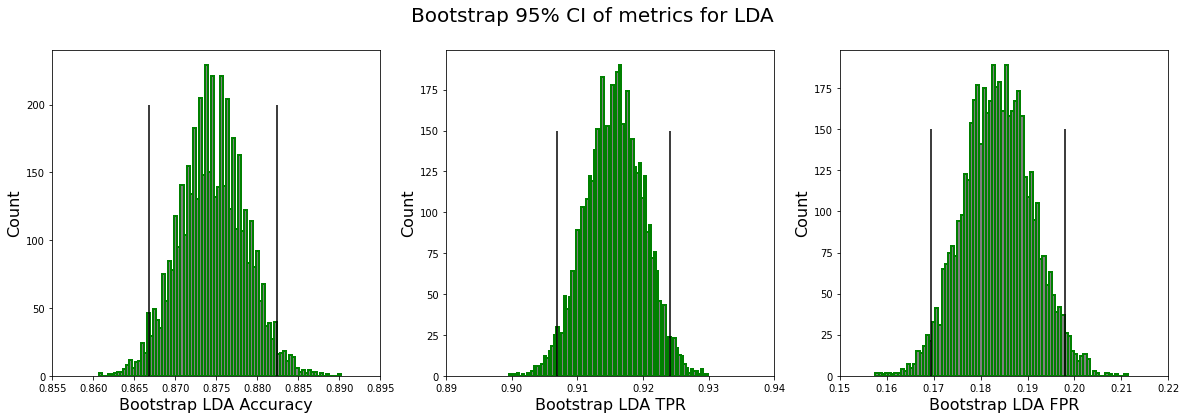

In [73]:
plt.figure(figsize=(20, 6))
plt.suptitle('Bootstrap 95% CI of metrics for LDA', fontsize=20)

plt.subplot(1, 3, 1)

plt.hist(bs_output.iloc[:, 0], bins=80,edgecolor='green', linewidth=2,color = "grey")
plt.xlabel('Bootstrap LDA Accuracy', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0.855,0.895])
plt.vlines(x=CI_ACC[0], ymin = 0, ymax = 200, color = "black")
plt.vlines(x=CI_ACC[1], ymin = 0, ymax = 200, color = "black")

plt.subplot(1, 3, 2)

plt.hist(bs_output.iloc[:, 1], bins=80,edgecolor='green', linewidth=2,color = "grey")
plt.xlabel('Bootstrap LDA TPR', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0.89,0.94])
plt.vlines(x=CI_TPR[0], ymin = 0, ymax = 150, color = "black")
plt.vlines(x=CI_TPR[1], ymin = 0, ymax = 150, color = "black")

plt.subplot(1, 3, 3)

plt.hist(bs_output.iloc[:, 2], bins=80,edgecolor='green', linewidth=2,color = "grey")
plt.xlabel('Bootstrap LDA FPR', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xlim([0.15,0.22])
plt.vlines(x=CI_FPR[0], ymin = 0, ymax = 150, color = "black")
plt.vlines(x=CI_FPR[1], ymin = 0, ymax = 150, color = "black")

plt.savefig('./bootstrap.jpg')

In [75]:
comment_train = pd.read_csv('./comment_train.csv')
comment_test = pd.read_csv('./comment_test.csv')

In [76]:
comment_train

,GoodTeaching,Comment
0,1,Anch 214 with Bergerson was a good class! He i...
1,0,The worst prof Ive ever had. Marks unnecessari...
2,0,This prof was not good at teaching at all. She...
3,1,He's an awesome professor! If you pay attentio...
4,0,I enjoyed chemistry but not with this teacher....
...,...,...
20126,1,I just started Dr. Ferragmo's Brain and Behavi...
20127,0,"This class is one big hassle. The ""lectures"" ..."
20128,0,I've literally never written a bad review in m...
20129,0,Dry humor. Not one day did he ever show up to ...


In [77]:
comment_test

,GoodTeaching,Comment
0,0,Dr. Grabner is a decent lady when she's not te...
1,1,I had Dr. Farkas for ENG466. We worked on the ...
2,1,HANDS DOWN one of the best profs I've had in a...
3,1,"Real tough class, but he knows the content ext..."
4,1,I took his online class and I thought he was g...
...,...,...
6706,0,Do not take!!!! Never take this professor. She...
6707,0,Don't take this guy unless you are a philosoph...
6708,1,He's one of the best teachers at OCC. He goes ...
6709,1,My favourite poli sci prof at Guelph! Makes dr...
